## Лабораторна робота №2.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [51]:
dataset = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', sep=',')
pd.set_option('display.max_columns', 10) # ддостаточно и 7, но пусть будет 10 про запас
pd.set_option('display.max_rows', 100)
print("типи змінних і кількість данних по кожній змінній", "\n")
dataset.info()#(memory_usage='deep') 
print("\n", "основна статистична інформація по числовим змінним", "\n")
print(dataset.describe())
print("\n", "розмірність датасету")
dataset.shape

типи змінних і кількість данних по кожній змінній 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 основна статистична інформація по числовим змінним 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000 

(891, 12)

Таким чином ми помітили, що у нашому датасеті 891 строка та 12 столбців.
Це видно ще при першій команді, але я вивела це додаткова

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [52]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки: 

Найбільш відсутня інформація про кабіни, в яких перебували пасажири (на мою думку, це можно пояснити такою теорїєю: людям надавали кабіни після посадки на борт, а бортові записи були загублені під час катастрофи)

Також у 177 людей відсутні данні про вік, бо, можливо, при купівлі білета - це було неважливо

Ще невідомо порти посадки двох особ, але це скоріш за все людський фактор.

У подальшому потрібно буде заповнити пропуски. Номери кабін буде неможливо дізнатись без додаткової інформації. Та вони нам і не нададуть якусь додаткову інформації. (Але якщо ми б мали схему корабля, розташування рятувальних шлюпок, інформацію про те, які саме двері відчинені, можно було б якось якось спрогнозувати виживання від відстані до найближчої шлюпки, кількості поворотів, тощо).

Порти можно замінити на найпопулярніший - Саутгемпт.

Вік ми розрахуємо як середнє за якимось параметром (стать, класс чи ще щось)

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



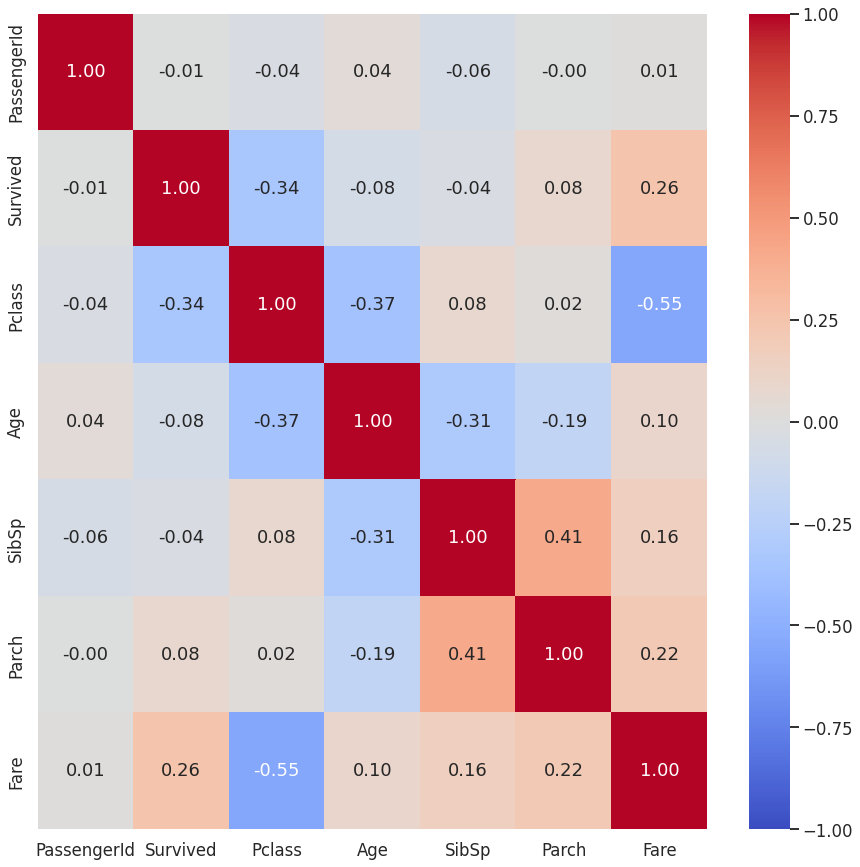

In [53]:
matr=dataset.corr(method='pearson') 
# new_matr=abs(matr) #для тепловой карты необходимы значения по модулю 
plt.figure(figsize=(15, 15))
hm2= sns.heatmap(matr, cmap="coolwarm", annot=True, fmt='.2f', vmax=1, vmin=-1)



Ваші висновки:
По-перше ми бачимо, що по головній діагоналі максимальний рівень пов'язанності. Так і має бути, бо ми порівнюємо одну і ту ж величину. 

Висока пов'язаність мають величини Pclass та Fare. Це логічно, бо чим вищий рівень обслуговування, тим вища ціна. Від'ємний результат через те, що найдорожчі білети 1-ого классу, а найдешевші- 3-ого. 

Середній рівень пов'язанності мають кількість батьків та кількість сестер/братів. Це наштовхує на думку, що люди подорожують або малою компанією (наодинці), чи одразу усією великою родиною. 

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [54]:
def unskip(dt, c_pass, c_help):
  for i in dt[c_pass]:
    dt[c_pass].fillna(dt[dt[c_help]==dt[c_help]][c_pass].median(), inplace = True)  
    # мы идем циклом по каждой строче. Если строка имеет пустое значение в c_pass, то мы ёё заполняем. Заполняем мы по следующему принципу:
    # 1. выбираем только те строки, где значение c_help совпадает с нашим текущим (это получается сделать так как в этом фрагменте dt[dt[c_help]==dt[c_help]] певрое dt[c_help] для любой строки с датафрейма, а второе для нашей конкретной строки)
    # 2. находим среднее в этих строках
    # 3. подставляем в пропуск


unskip(dataset, 'Age', 'Sex')
# unskip(dataset, 'Age', 'Pclass')


# print(dataset['Embarked'].value_counts())
# S    644
# C    168
# Q     77
# S- самое популярное, поэтому заменим пропуски им
dataset.Embarked.fillna('S', inplace = True)
dataset.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Ваші висновки: Для заповнення пропуску у віці можно було викорастати середній вік серед пасажирів одного класа чи однієї статті. Тому є функція, в яку ми задамо бажані параметри. 

Ми замінили путі порти на найропулярніший: Саутгемпт.

Значення кабін неважливо)

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Survived,0,1
Age_bin,,
0,45,55
1,343,180
2,112,76
3,39,30
4,10,1


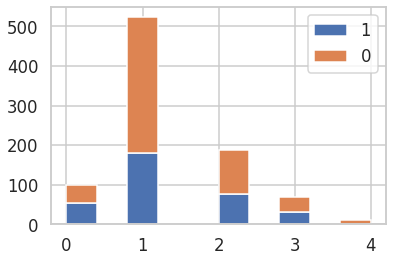

In [55]:
dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0, 16, 32, 48, 64, 80], labels=[0, 1, 2, 3, 4])


plt.hist([dataset[dataset['Survived']==1]['Age_bin'], dataset[dataset['Survived']==0]['Age_bin']], stacked=True, label=['1','0'])
plt.legend()

dataset.groupby(['Age_bin', 'Survived'])['Survived'].aggregate('count').unstack()



Ваші висновки: Для зручності, я привела таблицю значень, бо на візуалізації важко побачити точні значення. 
Найбільша вижавальність у дітей (до 16 років). Найменша: у людей похилого віку (від 64 років). 

Дрига знизу виживальність у молодих людей (16-31 рік). Але треба пам'ятати, що до них були віднесені усі люди с пропущеним полем Age. 
Цікава закономірність: до виконання 4 завдання середній показник вижавання для 1-ої вікової категорії 0.369942. А після виконання - 0.344168. Це можно пояснити тим, що більшість тих, хто мав пусте значення Age померли.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [56]:
dataset['Title'] = pd.qcut(dataset['Fare'], q= 5, labels =  ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond'])
# dataset['Fare'] = pd.qcut(dataset['Fare'], q= 5)

# dataset.groupby(['Fare', 'Survived'])['Survived'].aggregate('count').unstack()
dataset.groupby('Title').Survived.mean()


Title
Bronze      0.217877
Silver      0.201087
Gold        0.424419
Platinum    0.444444
Diamond     0.642045
Name: Survived, dtype: float64

Ваші висновки: Ми побачили, що кількість виживших збільшується з ціновою категорією пасажирів. 
Люди з клубу Diamond в 3 рази частіше виживали, ніж з категорії Bronze. Тому потрібно далі закодувати змінну Fare. 

У третьому завданні кореляційний коефіцієнт був 0.24, що доволі мало та можно було не помітити зв'язок. Це ще раз підтверджує той факт, що безперервні данні - незручні для машин. 

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

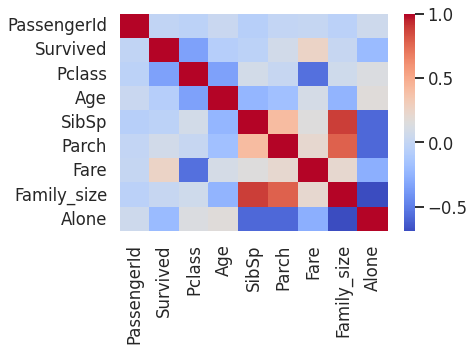

In [57]:
dataset['Family_size'] = dataset['Parch']+dataset['SibSp']
dataset['Alone'] = dataset.Family_size == 0


matr=dataset.corr(method='pearson') 
hm2= sns.heatmap(matr, cmap="coolwarm") #для облегчения восприятия не будем писать числовые значения 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

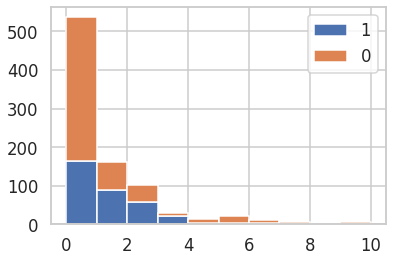

In [58]:
plt.hist([dataset[dataset['Survived']==1]['Family_size'], dataset[dataset['Survived']==0]['Family_size']], stacked=True, label=['1','0'])
plt.legend()
dataset.groupby('Family_size').Survived.mean()

Ваші висновки: Для перевірки гіпотези про те, що кількість людей у сім'ї впливає на виживання я побудувала теплову карту кореляції. Видно, що другий за значенням параметр для виживання після Pclass - це Alone. Тобто наявність  сім'ї збільшує шанс вижити. 
На перший погляд кількість родичів не впливає на виживання, але роглянемо більш детально. Видно, що більшість пасажирів були без родичів. Але ті, хто був з маленькою сім'єю (1-3 людини), той мав вищі шанси на порятунок. Але велика родина знижувала ці шанси.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [59]:
dataset.drop(columns=['Cabin', 'Ticket'], inplace=True)
dataset

,PassengerId,Survived,Pclass,Name,Sex,...,Embarked,Age_bin,Title,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,...,S,1,Bronze,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,C,2,Diamond,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,...,S,1,Silver,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,S,2,Diamond,1,False
4,5,0,3,"Allen, Mr. William Henry",male,...,S,2,Silver,0,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,...,S,1,Gold,0,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,...,S,1,Platinum,0,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,...,S,1,Platinum,3,False
889,890,1,1,"Behr, Mr. Karl Howell",male,...,C,1,Platinum,0,True


Ваші висновки: я вирішила видалити колонки з номерами білетів та номерами кабін. Номер білету не несе якусь допоміжну інформацію, а більша частина данних про номери кабін - відсутня. 

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [60]:
dataset['Sex'] = dataset['Sex'].replace(['female', 'male'], [0, 1])
dataset['Embarked'] = dataset['Embarked'].replace(['Q','C', 'S'], [0, 1, 2])
dataset['Title'] = dataset['Title'].replace(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond'], [0, 1, 2, 3, 4])
dataset

,PassengerId,Survived,Pclass,Name,Sex,...,Embarked,Age_bin,Title,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,...,2,1,0,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,...,1,2,4,1,False
2,3,1,3,"Heikkinen, Miss. Laina",0,...,2,1,1,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,...,2,2,4,1,False
4,5,0,3,"Allen, Mr. William Henry",1,...,2,2,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,...,2,1,2,0,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,...,2,1,3,0,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,...,2,1,3,3,False
889,890,1,1,"Behr, Mr. Karl Howell",1,...,1,1,3,0,True


Ваші висновки: Щоб можно було далі аналізувати наші змінні ми поліпшили їх для розуміння машиною та перетворили їх на числові.

Sex: 0 - female, 1 - male

Embarked: Q - 0, C - 1, S - 2

Fare: від 0 до 4 за зростанням категорії дорогизни білету. 

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



Text(0.5, 1.0, 'Порт посадки')

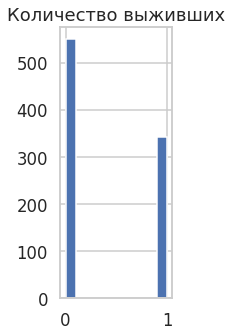

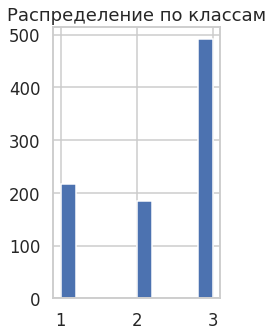

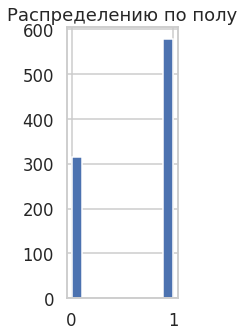

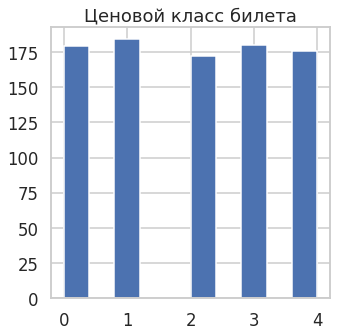

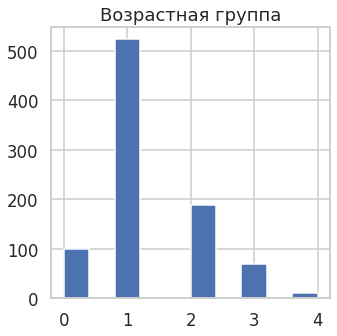

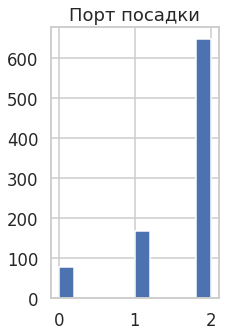

In [61]:
# plt.plot(dataset['Survived'], dataset['Survived'].value_counts)
# plt.plot(dataset['Pclass'])

plt.figure(figsize=(2, 5))
plt.hist(dataset['Survived'])
plt.title('Количество выживших')           

plt.figure(figsize=(3, 5))
plt.hist(dataset['Pclass'])
plt.title('Распределение по классам')      

plt.figure(figsize=(2, 5))
plt.hist(dataset['Sex'])
plt.title('Распределению по полу') 

plt.figure(figsize=(5, 5))
plt.hist(dataset['Title'])
plt.title('Ценовой класс билета')  

plt.figure(figsize=(5, 5))
plt.hist(dataset['Age_bin'])
plt.title('Возрастная группа')   

plt.figure(figsize=(3, 5))
plt.hist(dataset['Embarked'])
plt.title('Порт посадки')   


# p2 = dataset['Pclass'].hist()
# p1 = dataset['Survived'].hist()
# p1 = dataset['Survived'].hist()
# p1 = dataset['Survived'].hist()

# p1 = plt.plot(dataset['Pclass'], dataset['PassengerId'])

# h2 = dataset['Pclass'].hist()

Ваші висновки: Ми бачисо, що 62% загинуло.

До 1-ого класу відноситься 24%, 2-ого - 21%, аа 3-ого - 55%. Тобто третього классу більше нуж разом узятих першого і другого. 

Чоловіків було 65%. 

Цінова категорія білетів рівномірно розподілена (ми самі її так задавали).

Дітей на борту було 11%, 59% молодих, 21% дорослих, 8% немолодих, 1% старих. Тобто днайбільше було молодих та дорослих людей. 

У Шербурзі сіло 19%,у Квинстауні 9%, у Саутгемптоні(початковій станції) 72%.

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0.5, 1.0, 'Распределение по размеру семьи')

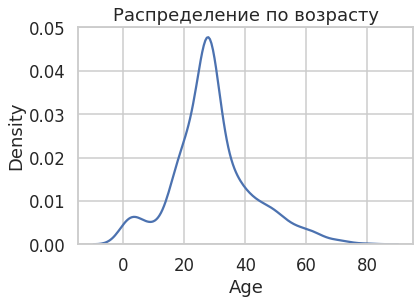

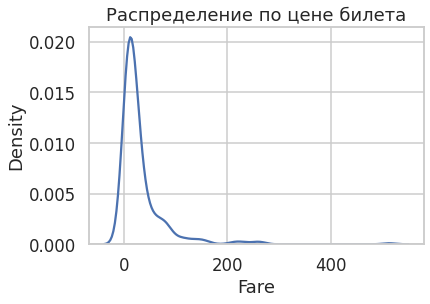

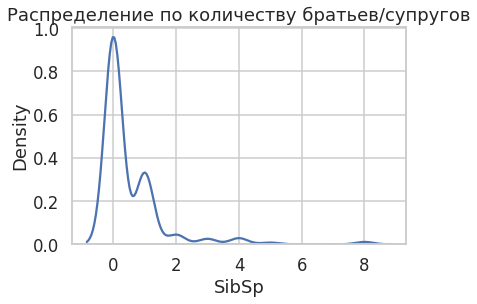

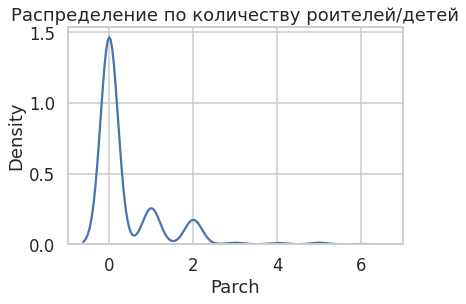

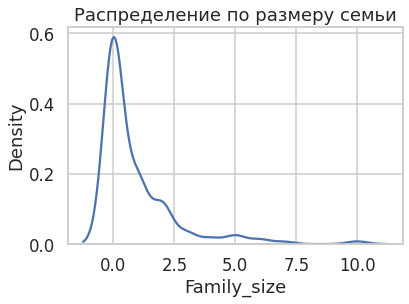

In [62]:
plt.figure()
sns.distplot(dataset['Age'], hist = False)
plt.title('Распределение по возрасту')
plt.figure()
sns.distplot(dataset['Fare'], hist = False)
plt.title('Распределение по цене билета')
plt.figure()
sns.distplot(dataset['SibSp'], hist = False)
plt.title('Распределение по количеству братьев/супругов')
plt.figure()
sns.distplot(dataset['Parch'], hist = False)
plt.title('Распределение по количеству роителей/детей')
plt.figure()
sns.distplot(dataset['Family_size'], hist = False)
plt.title('Распределение по размеру семьи')

Ваші висновки: Як вказувалось раніше більша частина - це молоді люди.

Як правило, люди купували білет до 50 доларів (ціна білету до 3-ого класу була порівнянною с місячною зарабітнею платнею звичайного робочого).

Більшість людей їхала наодинці або малою сім'єю.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Связь с PassengerId


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/numpy/c

Связь с Pclass


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

Связь с Sex


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spe

Связь с Survived


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:107: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this wa

<Figure size 432x288 with 0 Axes>

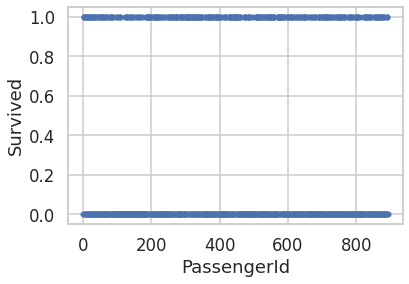

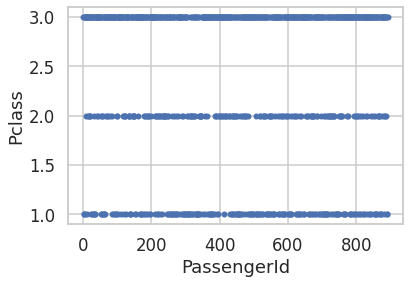

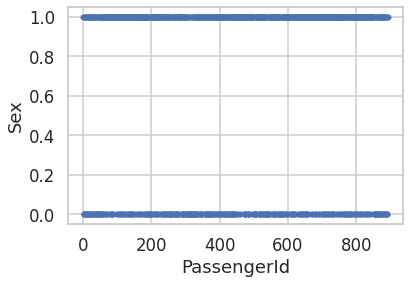

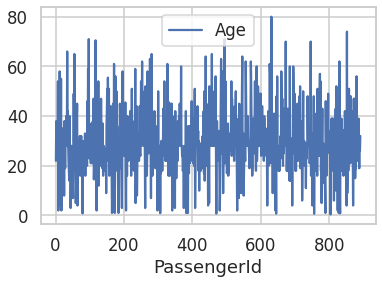

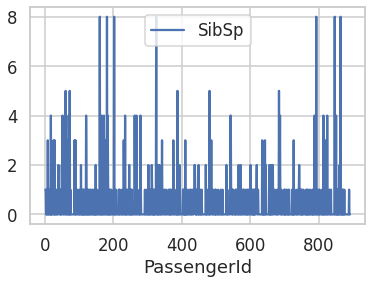

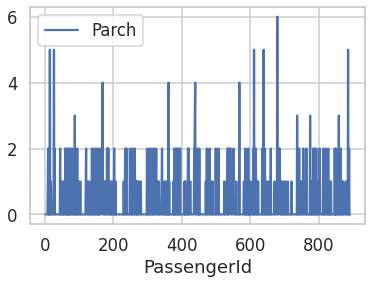

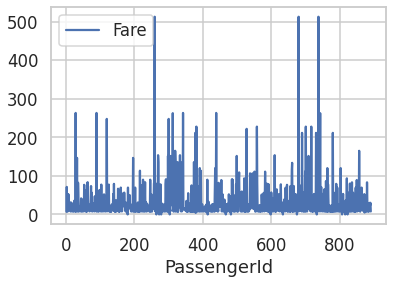

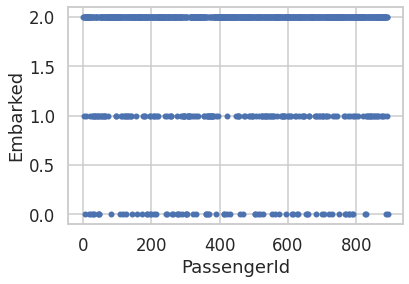

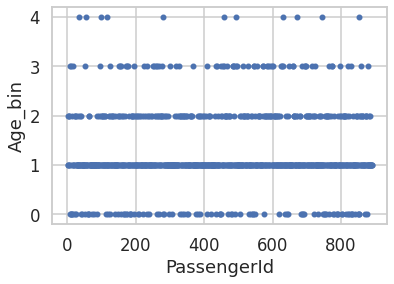

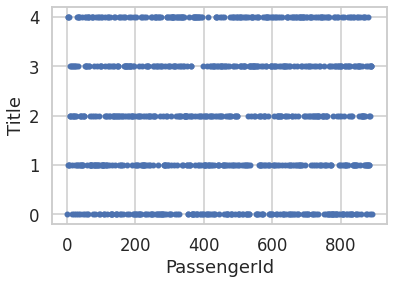

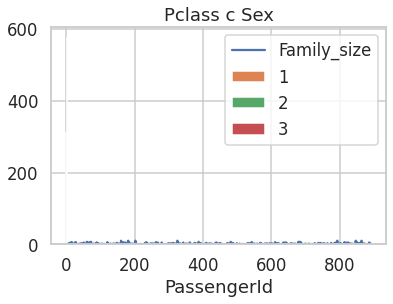

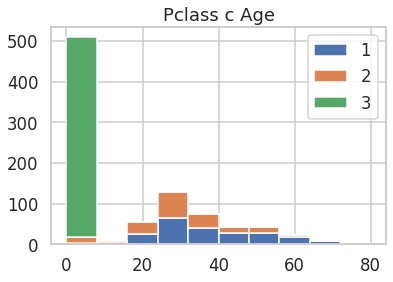

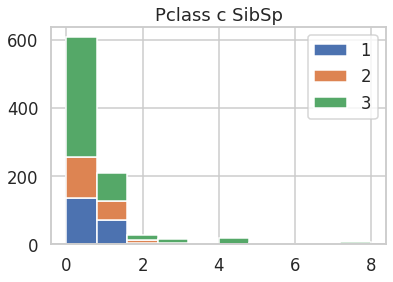

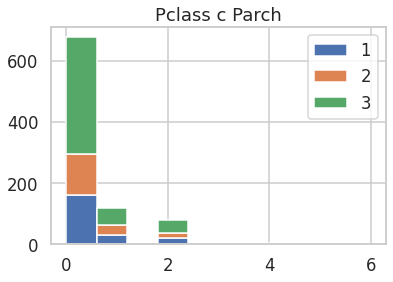

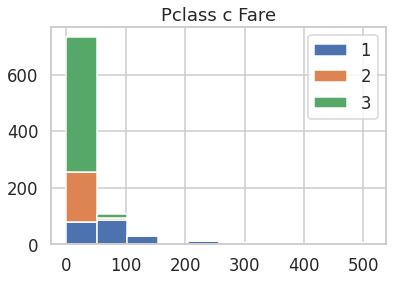

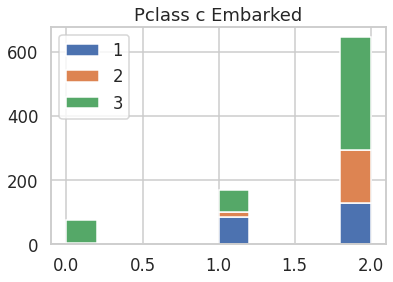

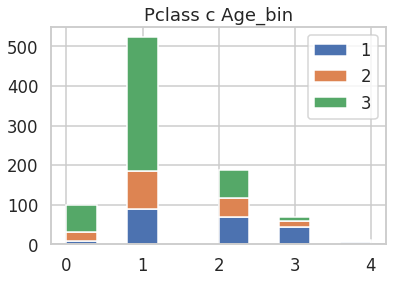

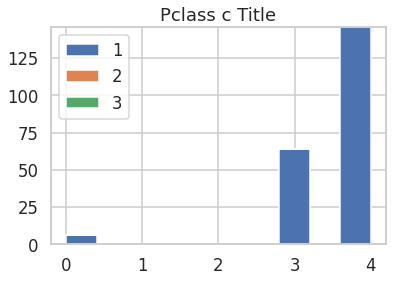

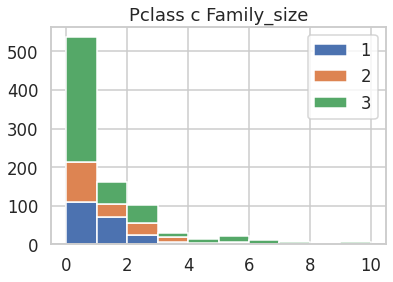

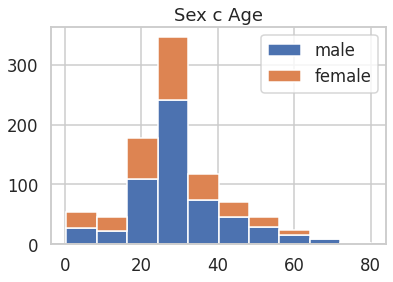

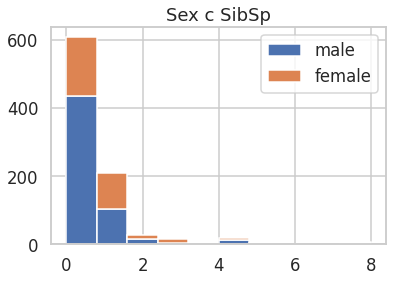

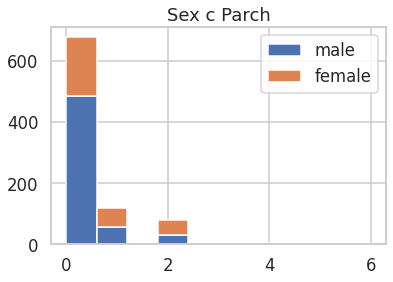

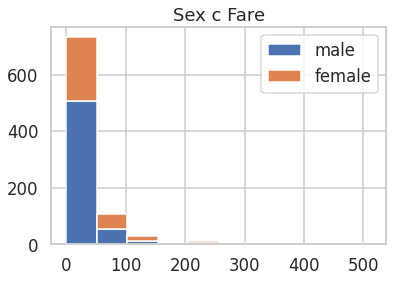

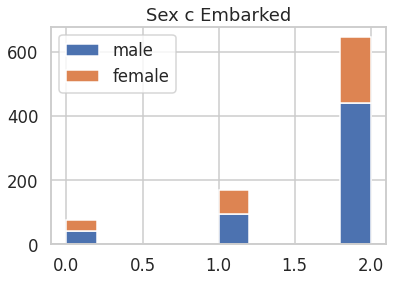

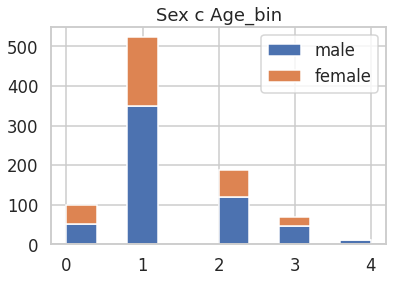

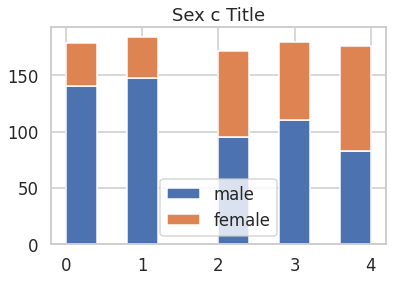

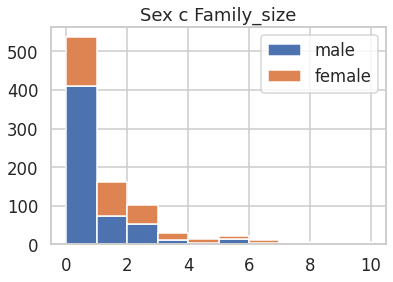

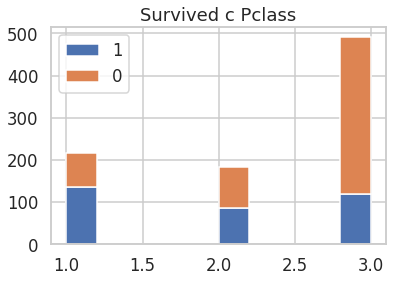

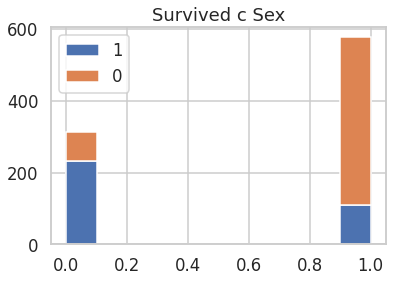

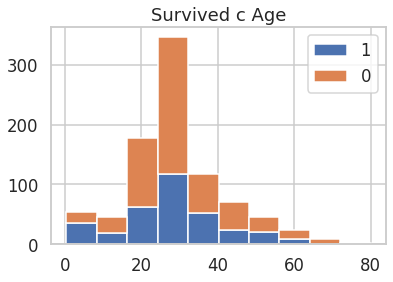

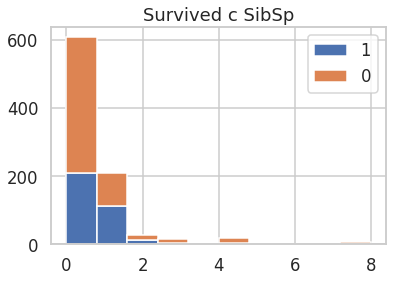

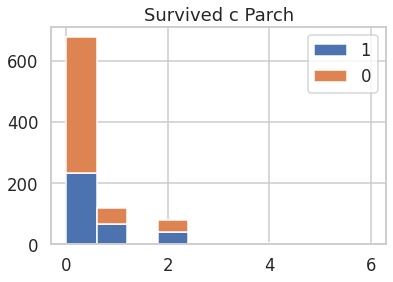

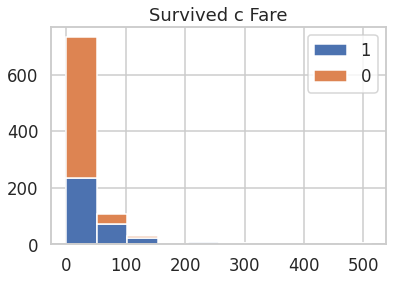

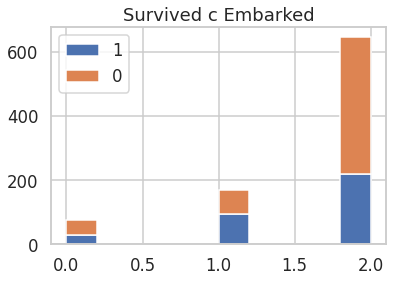

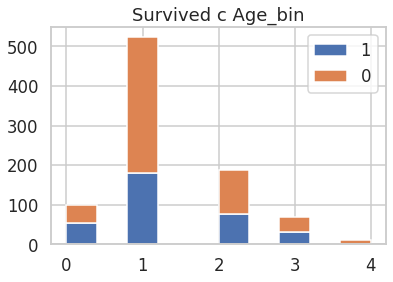

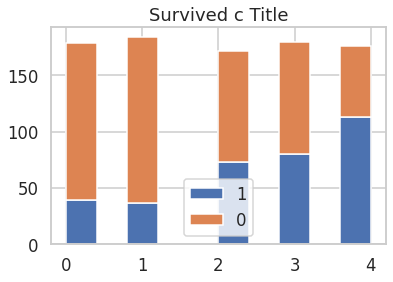

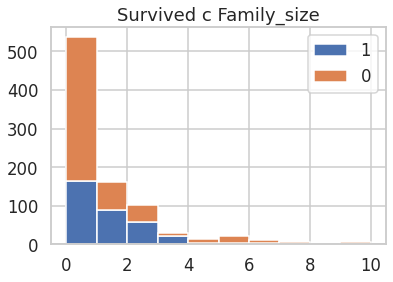

<Figure size 432x288 with 0 Axes>

In [63]:
print('Связь с PassengerId')
dataset.plot(x='PassengerId', y='Survived', kind = 'scatter')
dataset.plot(x='PassengerId', y='Pclass', kind = 'scatter')
dataset.plot(x='PassengerId', y='Sex', kind = 'scatter')
dataset.plot(x='PassengerId', y='Age')
dataset.plot(x='PassengerId', y='SibSp')
dataset.plot(x='PassengerId', y='Parch')
dataset.plot(x='PassengerId', y='Fare')
dataset.plot(x='PassengerId', y='Embarked', kind = 'scatter')
dataset.plot(x='PassengerId', y='Age_bin', kind = 'scatter')
dataset.plot(x='PassengerId', y='Title', kind = 'scatter')
dataset.plot(x='PassengerId', y='Family_size')

print('Связь с Pclass')
plt.hist([dataset[dataset['Pclass']==1]['Sex'], dataset[dataset['Pclass']==2]['Sex'], dataset[dataset['Pclass']==3]['Sex']], stacked=True, label=['1','2', '3'])
plt.legend()
plt.title('Pclass c Sex')
plt.figure()
plt.hist([dataset[dataset['Pclass']==1]['Age'], dataset[dataset['Pclass']==2]['Age'], dataset[dataset['Pclass']==3]['Sex']], stacked=True, label=['1','2', '3'])
plt.legend()
plt.title('Pclass c Age')
plt.figure()
plt.hist([dataset[dataset['Pclass']==1]['SibSp'], dataset[dataset['Pclass']==2]['SibSp'], dataset[dataset['Pclass']==3]['SibSp']], stacked=True, label=['1','2', '3'])
plt.legend()
plt.title('Pclass c SibSp')
plt.figure()
plt.hist([dataset[dataset['Pclass']==1]['Parch'], dataset[dataset['Pclass']==2]['Parch'], dataset[dataset['Pclass']==3]['Parch']], stacked=True, label=['1','2', '3'])
plt.legend()
plt.title('Pclass c Parch')
plt.figure()
plt.hist([dataset[dataset['Pclass']==1]['Fare'], dataset[dataset['Pclass']==2]['Fare'], dataset[dataset['Pclass']==3]['Fare']], stacked=True, label=['1','2', '3'])
plt.legend()
plt.title('Pclass c Fare')
plt.figure()
plt.hist([dataset[dataset['Pclass']==1]['Embarked'], dataset[dataset['Pclass']==2]['Embarked'], dataset[dataset['Pclass']==3]['Embarked']], stacked=True, label=['1','2', '3'])
plt.legend()
plt.title('Pclass c Embarked')
plt.figure()
plt.hist([dataset[dataset['Pclass']==1]['Age_bin'], dataset[dataset['Pclass']==2]['Age_bin'], dataset[dataset['Pclass']==3]['Age_bin']], stacked=True, label=['1','2', '3'])
plt.legend()
plt.title('Pclass c Age_bin')
plt.figure()
plt.hist([dataset[dataset['Pclass']==1]['Title'], dataset[dataset['Survived']==2]['Title'], dataset[dataset['Survived']==3]['Title']], stacked=True, label=['1','2', '3'])
plt.legend()
plt.title('Pclass c Title')
plt.figure()
plt.hist([dataset[dataset['Pclass']==1]['Family_size'], dataset[dataset['Pclass']==2]['Family_size'], dataset[dataset['Pclass']==3]['Family_size']], stacked=True, label=['1','2', '3'])
plt.legend()
plt.title('Pclass c Family_size')
plt.figure()

print('Связь с Sex')

plt.hist([dataset[dataset['Sex']==1]['Age'], dataset[dataset['Sex']==0]['Age']], stacked=True, label=['male','female'])
plt.legend()
plt.title('Sex c Age')
plt.figure()
plt.hist([dataset[dataset['Sex']==1]['SibSp'], dataset[dataset['Sex']==0]['SibSp']], stacked=True, label=['male','female'])
plt.legend()
plt.title('Sex c SibSp')
plt.figure()
plt.hist([dataset[dataset['Sex']==1]['Parch'], dataset[dataset['Sex']==0]['Parch']], stacked=True, label=['male','female'])
plt.legend()
plt.title('Sex c Parch')
plt.figure()
plt.hist([dataset[dataset['Sex']==1]['Fare'], dataset[dataset['Sex']==0]['Fare']], stacked=True, label=['male','female'])
plt.legend()
plt.title('Sex c Fare')
plt.figure()
plt.hist([dataset[dataset['Sex']==1]['Embarked'], dataset[dataset['Sex']==0]['Embarked']], stacked=True, label=['male','female'])
plt.legend()
plt.title('Sex c Embarked')
plt.figure()
plt.hist([dataset[dataset['Sex']==1]['Age_bin'], dataset[dataset['Sex']==0]['Age_bin']], stacked=True, label=['male','female'])
plt.legend()
plt.title('Sex c Age_bin')
plt.figure()
plt.hist([dataset[dataset['Sex']==1]['Title'], dataset[dataset['Sex']==0]['Title']], stacked=True, label=['male','female'])
plt.legend()
plt.title('Sex c Title')
plt.figure()
plt.hist([dataset[dataset['Sex']==1]['Family_size'], dataset[dataset['Sex']==0]['Family_size']], stacked=True, label=['male','female'])
plt.legend()
plt.title('Sex c Family_size')
plt.figure()

print('Связь с Survived')
plt.hist([dataset[dataset['Survived']==1]['Pclass'], dataset[dataset['Survived']==0]['Pclass']], stacked=True, label=['1','0'])
plt.legend()
plt.title('Survived c Pclass')
plt.figure()
plt.hist([dataset[dataset['Survived']==1]['Sex'], dataset[dataset['Survived']==0]['Sex']], stacked=True, label=['1','0'])
plt.legend()
plt.title('Survived c Sex')
plt.figure()
plt.hist([dataset[dataset['Survived']==1]['Age'], dataset[dataset['Survived']==0]['Age']], stacked=True, label=['1','0'])
plt.legend()
plt.title('Survived c Age')
plt.figure()
plt.hist([dataset[dataset['Survived']==1]['SibSp'], dataset[dataset['Survived']==0]['SibSp']], stacked=True, label=['1','0'])
plt.legend()
plt.title('Survived c SibSp')
plt.figure()
plt.hist([dataset[dataset['Survived']==1]['Parch'], dataset[dataset['Survived']==0]['Parch']], stacked=True, label=['1','0'])
plt.legend()
plt.title('Survived c Parch')
plt.figure()
plt.hist([dataset[dataset['Survived']==1]['Fare'], dataset[dataset['Survived']==0]['Fare']], stacked=True, label=['1','0'])
plt.legend()
plt.title('Survived c Fare')
plt.figure()
plt.hist([dataset[dataset['Survived']==1]['Embarked'], dataset[dataset['Survived']==0]['Embarked']], stacked=True, label=['1','0'])
plt.legend()
plt.title('Survived c Embarked')
plt.figure()
plt.hist([dataset[dataset['Survived']==1]['Age_bin'], dataset[dataset['Survived']==0]['Age_bin']], stacked=True, label=['1','0'])
plt.legend()
plt.title('Survived c Age_bin')
plt.figure()
plt.hist([dataset[dataset['Survived']==1]['Title'], dataset[dataset['Survived']==0]['Title']], stacked=True, label=['1','0'])
plt.legend()
plt.title('Survived c Title')
plt.figure()
plt.hist([dataset[dataset['Survived']==1]['Family_size'], dataset[dataset['Survived']==0]['Family_size']], stacked=True, label=['1','0'])
plt.legend()
plt.title('Survived c Family_size')
plt.figure()

Ваші висновки: На цих графікаї є дуже багато інформації і тому я зосереджусь на найцікавішому (як вижити):
Чим більше грошей ти заплатив за білет, тим більше шансів вижити.
Якщо ти жінка або дитина, то в тебе було більше шансів вижити.

Також цікаві спостереження: у третьому класі переважно були чоловіки, поодинокі люди частіше гинули, жінки мали більші сім'ї; є людина 80 років, що вижила і ці данні дуже схожі на виброс.

Який можно зробити висновок з цієї лабораторної роботи: якщо ти багато заплатив за білет, дівчинка та дитина, подорожуєшь маленькою сім'єю, то в тебе високі шанси на порятунок. 

З цієї лабораторної роботи я винесла для себе наступне: з непреривними даними складно процявати, треба робити категорії; іноді не треба дивитися на кореляцію і казати, що нема зв'язку, а треба більш детально роздивитися. 

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.